## Exercise 2: Data Exploration and Analysis

For this exercise we are going to use pandas library. You can find more information about pandas in the following link:https://pandas.pydata.org/

The dataset for this exercise is from Kaggle called "Which Ketchup is Best?" meaning our goal is to answer the question using data science. You can download the dataset here: https://www.kaggle.com/datasets/ulrikthygepedersen/which-ketchup-is-best

You can earn on this exercise in total 10 points. At the very end of this notebook, we provide a bonus question that could grant you an additional 1 point. 

The deadline to submit your solutions to this exercise is **at 12.00 (noon), next Thursday (09.03.2022)**. Please submit your solutions in python notebook format (.ipynb). 

Data exploration is a essential step in any data analysis. It helps to understand its underlying patterns, relationships and trents. This undestanding can help you to design appropriate models and techniques to analyze the data. Furthemore, you can comprehend the performance of any model easier if you have a full understanding of your dataset.

First and foremost, we import required libraries and load the dataset as follows:

In [30]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# enable inline plotting
%matplotlib inline 

In [31]:
#load the data
data = pd.read_csv("data/Ketchup.csv", sep=',')

We can see the column "Unnamed:0" which is the indexing of entries. Since pandas also creates automatically indices, we can delete it as following:

In [32]:
del data["Unnamed: 0"]

In [33]:
data.head()

,Ketchup.hid,Ketchup.id,Ketchup.choice,price.heinz,price.hunts,price.delmonte,price.stb
0,1,1,heinz,1.19,1.39,1.49,0.89
1,1,2,heinz,0.99,1.36,1.39,0.95
2,1,3,hunts,1.46,1.43,1.49,0.99
3,1,4,hunts,1.46,1.43,1.45,0.99
4,1,5,stb,1.46,1.36,1.39,0.95


In [34]:
data.tail()

,Ketchup.hid,Ketchup.id,Ketchup.choice,price.heinz,price.hunts,price.delmonte,price.stb
4951,1952,1,stb,1.39,1.31,1.45,0.99
4952,1953,1,heinz,1.39,1.39,0.99,0.79
4953,1954,1,stb,1.39,1.43,1.45,0.79
4954,1955,1,stb,1.39,0.79,1.45,0.79
4955,1956,1,stb,1.39,1.39,1.46,0.79


In [35]:
data.sample(10)

,Ketchup.hid,Ketchup.id,Ketchup.choice,price.heinz,price.hunts,price.delmonte,price.stb
3705,1404,2,heinz,0.99,1.53,1.49,0.95
1822,674,1,heinz,0.99,1.53,1.46,0.95
1362,505,4,heinz,1.46,1.36,1.39,0.95
4040,1533,1,heinz,0.99,1.19,1.39,0.95
3015,1142,1,hunts,1.19,1.49,1.39,0.89
271,99,9,hunts,1.19,0.79,1.49,0.95
981,360,1,heinz,1.19,1.39,1.49,0.89
809,293,1,heinz,1.46,1.53,1.45,0.99
4695,1812,1,heinz,1.46,1.49,1.39,0.95
1670,615,5,delmonte,1.19,0.89,1.49,0.95


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ketchup.hid     4956 non-null   int64  
 1   Ketchup.id      4956 non-null   int64  
 2   Ketchup.choice  4956 non-null   object 
 3   price.heinz     4956 non-null   float64
 4   price.hunts     4956 non-null   float64
 5   price.delmonte  4956 non-null   float64
 6   price.stb       4956 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 271.2+ KB


In [37]:
data.iloc[0:3]

,Ketchup.hid,Ketchup.id,Ketchup.choice,price.heinz,price.hunts,price.delmonte,price.stb
0,1,1,heinz,1.19,1.39,1.49,0.89
1,1,2,heinz,0.99,1.36,1.39,0.95
2,1,3,hunts,1.46,1.43,1.49,0.99


In [38]:
data["price.heinz"]

0       1.19
1       0.99
2       1.46
3       1.46
4       1.46
        ... 
4951    1.39
4952    1.39
4953    1.39
4954    1.39
4955    1.39
Name: price.heinz, Length: 4956, dtype: float64

In [39]:
#translating to numpy array
data["price.heinz"].to_numpy()

array([1.19, 0.99, 1.46, ..., 1.39, 1.39, 1.39])

In [40]:
data.describe()

,Ketchup.hid,Ketchup.id,price.heinz,price.hunts,price.delmonte,price.stb
count,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000
mean,936.721550,3.095642,1.248900,1.343860,1.426945,0.921178
std,549.104119,3.065865,0.204913,0.176185,0.114157,0.068198
min,1.000000,1.000000,0.790000,0.790000,0.890000,0.750000
25%,463.750000,1.000000,0.990000,1.360000,1.390000,0.890000
50%,923.000000,2.000000,1.190000,1.390000,1.460000,0.950000
75%,1406.000000,4.000000,1.460000,1.430000,1.490000,0.950000
max,1956.000000,24.000000,1.470000,1.530000,1.490000,0.990000


We can notice from above that Ketchup.choice is not described since it is a categorical data. 

**Task 1 (1 point)**. Replace categories (heinz, stb, hunts and delmonte) with integers as 1,2,3,4 and print the description of the resultant dataset. 

In [41]:
mapping = {"heinz": 1, "stb": 2, "hunts": 3, "delmonte": 4}
data["Ketchup.choice"] = data["Ketchup.choice"].map(mapping)
data.describe()

,Ketchup.hid,Ketchup.id,Ketchup.choice,price.heinz,price.hunts,price.delmonte,price.stb
count,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000
mean,936.721550,3.095642,1.799233,1.248900,1.343860,1.426945,0.921178
std,549.104119,3.065865,0.939033,0.204913,0.176185,0.114157,0.068198
min,1.000000,1.000000,1.000000,0.790000,0.790000,0.890000,0.750000
25%,463.750000,1.000000,1.000000,0.990000,1.360000,1.390000,0.890000
50%,923.000000,2.000000,1.000000,1.190000,1.390000,1.460000,0.950000
75%,1406.000000,4.000000,3.000000,1.460000,1.430000,1.490000,0.950000
max,1956.000000,24.000000,4.000000,1.470000,1.530000,1.490000,0.990000


**Task 2 (1 point)**. Group the dataset according to Ketchup.choice and print its description. Which ketchup is leading from the number of entries?

In [42]:
grouped_data = data.groupby("Ketchup.choice")
print(grouped_data.describe())
leading_ketchup = grouped_data.size().idxmax()
print(f"The leading ketchup is {leading_ketchup}")

               Ketchup.hid                                                     \
                     count        mean         std  min    25%    50%     75%   
Ketchup.choice                                                                  
1                   2526.0  928.501979  546.409356  1.0  463.5  912.5  1385.0   
2                   1155.0  923.632900  550.308049  1.0  450.5  894.0  1408.0   
3                   1019.0  969.874387  554.618956  1.0  509.0  972.0  1463.0   
4                    256.0  944.914062  545.985571  6.0  422.0  994.0  1387.5   

                       Ketchup.id            ... price.delmonte        \
                   max      count      mean  ...            75%   max   
Ketchup.choice                               ...                        
1               1953.0     2526.0  2.391528  ...           1.49  1.49   
2               1956.0     1155.0  4.451082  ...           1.49  1.49   
3               1950.0     1019.0  3.155054  ...           1.49  1.

Plotting histograms of data helps us to understand the distrubiton and the trend.

array([[<AxesSubplot:title={'center':'price.delmonte'}>]], dtype=object)

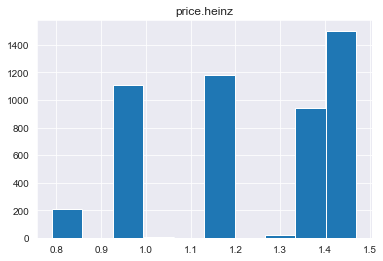

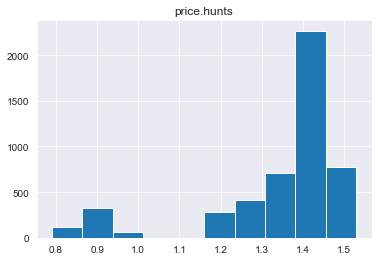

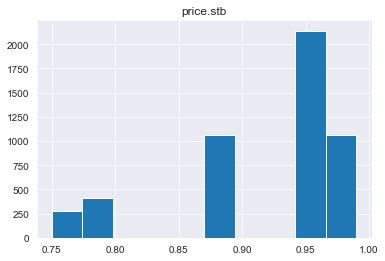

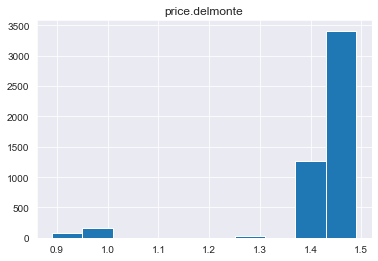

In [43]:
data.hist(["price.heinz"])
data.hist([ "price.hunts"])
data.hist([ "price.stb"])
data.hist([ "price.delmonte"])


**Task 3 (2 point)**. Plot the same histograms of each pricing column in the form of subplots (2x2) and set titles accordingly.

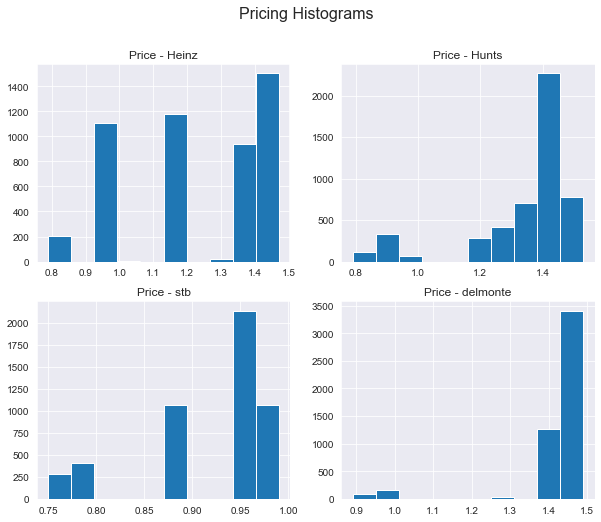

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histograms of each pricing column in the subplots
data["price.heinz"].hist(ax=axs[0, 0])
axs[0, 0].set_title("Price - Heinz")

data["price.hunts"].hist(ax=axs[0, 1])
axs[0, 1].set_title("Price - Hunts")

data["price.stb"].hist(ax=axs[1, 0])
axs[1, 0].set_title("Price - stb")

data["price.delmonte"].hist(ax=axs[1, 1])
axs[1, 1].set_title("Price - delmonte")

fig.suptitle("Pricing Histograms", fontsize=16)

plt.show()

**Task 4 (2 points)**. Create a new column with chosen ketchup prices and name the column as price.choice. For example, if Ketchup.choice is heinz, then insert into a row of price.choice a corresponding value from price.heinz.

In [45]:
def get_ketchup_price(row):
    if row["Ketchup.choice"] == 1:
        return row["price.heinz"]
    elif row["Ketchup.choice"] == 2:
        return row["price.stb"]
    elif row["Ketchup.choice"] == 3:
        return row["price.hunts"]
    elif row["Ketchup.choice"] == 4:
        return row["price.delmonte"]
    else:
        return None

data["price.choice"] = data.apply(get_ketchup_price, axis=1)

print(data)

      Ketchup.hid  Ketchup.id  Ketchup.choice  price.heinz  price.hunts  \
0               1           1               1         1.19         1.39   
1               1           2               1         0.99         1.36   
2               1           3               3         1.46         1.43   
3               1           4               3         1.46         1.43   
4               1           5               2         1.46         1.36   
...           ...         ...             ...          ...          ...   
4951         1952           1               2         1.39         1.31   
4952         1953           1               1         1.39         1.39   
4953         1954           1               2         1.39         1.43   
4954         1955           1               2         1.39         0.79   
4955         1956           1               2         1.39         1.39   

      price.delmonte  price.stb  price.choice  
0               1.49       0.89          1.19  
1  

**Task 5 (2 points)**. Plot a normalized histogram of the price.choice with its kernel density estimate (kde) for the probability density function. 

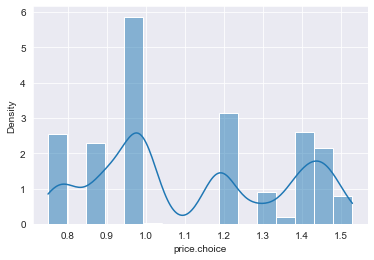

In [46]:
def get_ketchupname(row):
    if row["Ketchup.choice"] == 1:
        return "heinz"
    elif row["Ketchup.choice"] == 2:
        return "stb"
    elif row["Ketchup.choice"] == 3:
        return "hunts"
    elif row["Ketchup.choice"] == 4:
        return "delmonte"
    else:
        return None

data["price.choice"] = data.apply(lambda row: row[f"price.{get_ketchupname(row)}"], axis=1)

sns.histplot(data=data, x="price.choice", kde=True, stat="density")

plt.show()

Thanks to the open-source nature of python, there are tons of libraries that can make our lives easier. Besides, matplotlib that we used in our previous tasks, there are other plotting libraries such as plotly. It's interactive and easy to use. You can find the documentation for it here:https://plotly.com/python/

Also, you can install any library directly from your notebook as follows:

%pip install plotly

In [47]:
import plotly.express as px

**Task 6 (1 point)**. Make a figure as boxplots of each ketchup.choice in terms of price.choice. You might need to search for boxplots from plotly documentation for that. 

In [48]:
fig = px.box(data_frame=data, x="Ketchup.choice", y="price.choice")

fig.show()

Sometimes we play around with the data a lot and make too many changes to original data. Therefore, it is recommended to create the copy of the data and modify on it only.

In [49]:
datacopy = data.copy()

**Task 7 (1 point)**.Estimate the correlation matrix in-between variables first.

In [52]:
corr = data.corr()

print(corr)

                Ketchup.hid  Ketchup.id  Ketchup.choice  price.heinz  \
Ketchup.hid        1.000000   -0.076187        0.022991     0.014231   
Ketchup.id        -0.076187    1.000000        0.150307     0.140130   
Ketchup.choice     0.022991    0.150307        1.000000     0.360353   
price.heinz        0.014231    0.140130        0.360353     1.000000   
price.hunts        0.058469    0.029573       -0.225416    -0.102579   
price.delmonte    -0.039215   -0.035072       -0.215057    -0.141859   
price.stb          0.021922   -0.060171       -0.034910    -0.160832   
price.choice       0.015305   -0.092934        0.057491     0.368513   

                price.hunts  price.delmonte  price.stb  price.choice  
Ketchup.hid        0.058469       -0.039215   0.021922      0.015305  
Ketchup.id         0.029573       -0.035072  -0.060171     -0.092934  
Ketchup.choice    -0.225416       -0.215057  -0.034910      0.057491  
price.heinz       -0.102579       -0.141859  -0.160832      0.36851

Plotting the correlation matrix in the form of heat map helps to perceive the results easier.

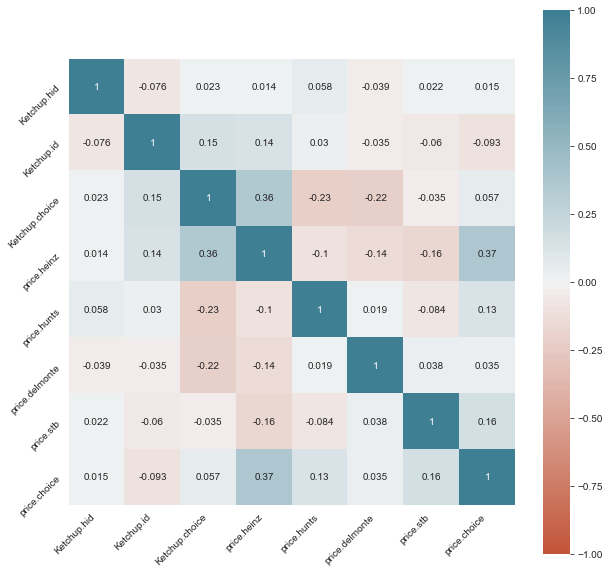

In [53]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,
);

**Task 8 (bonus point)**. What is your conclusion? Which ketchup is the best? Justify your answer.

Your response: